In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph
import matplotlib.animation as animation
pd.set_option('display.max_rows', None)
plt.ion()
from itertools import combinations, groupby
import collections

In [15]:
importation = pd.read_csv(r'datafile/COVID_importations.csv')
importation

,Date,Estimated COVID importations
0,1/1/20,0.006103
1,2/1/20,0.047394
2,3/1/20,0.058659
3,4/1/20,0.071773
4,5/1/20,0.098316
5,6/1/20,0.135756
6,7/1/20,0.170815
7,8/1/20,0.194430
8,9/1/20,0.294514
9,10/1/20,0.343452


In [16]:
n = 50
p= 0.4 #the probability of a node to be connected
A_prob = np.random.rand(n,n)
A = (A_prob<p).astype('int')
im = importation['Estimated COVID importations'].astype('int')

G = erdos_renyi_graph(n,p)
print("node\tdegree\tclustering")
for v in nx.nodes(G):
    print("%s\t%d\t%f" % (v, nx.degree(G,v), nx.clustering(G,v)))

print("*"*30)
print("Adjacent List")
for line in nx.generate_adjlist(G):
    print(line)

In [17]:
from numpy import random
x=random.randint(2, size=(50))

In [18]:
n = 4
p= 0.4 #the probability of a node to be connected
A_prob = np.random.rand(n,n)
A = (A_prob<p).astype('int')

In [ ]:
A

In [ ]:
arr=[0,1,1,1,1]

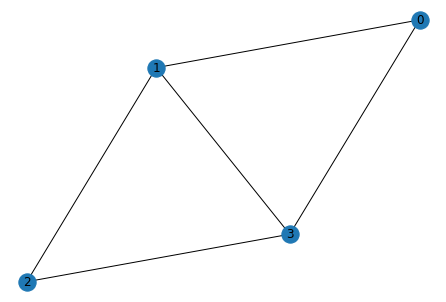

In [20]:
G = nx.Graph(A)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True) #use spring layout
for i in range(10):
    G.add_node(i)

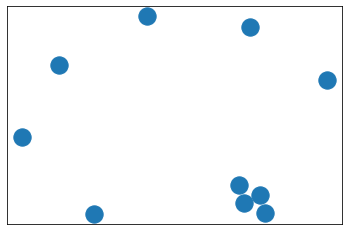

In [21]:
nodes = nx.draw_networkx_nodes(G, pos=nx.spring_layout(G))


AtlasView({0: {}, 3: {}, 5: {}, 21: {}, 31: {}, 40: {}, 45: {}, 49: {}, 77: {}, 79: {}, 97: {}})

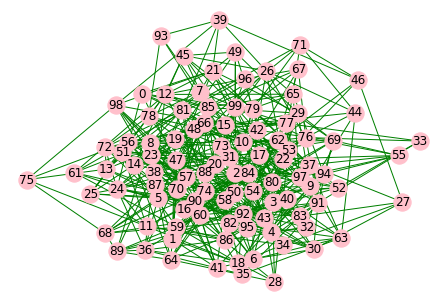

In [29]:
z = [10 for i in range(100)]
G = nx.expected_degree_graph(z)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color='pink', edge_color='green')
G[99]

In [ ]:
def random_edge(graph):
    '''
    Create a new random edge and delete one of its current edge if del_orig is True.
    :param graph: networkx graph
    :param del_orig: bool
    :return: networkx graph
    '''
    edges = list(graph.edges)
    nonedges = list(nx.non_edges(graph))
    nodes = list(graph.nodes())
    
    #Nodes to add in: 
    nodemine=[111,222,333,444,555,666]
    
    #random choice:
    chosen_edge = random.choice(edges)
    chosen_nonedge = random.choice([x for x in nonedges if chosen_edge[0] == x[0]])
    chosen_node = random.choice(nodes)
    
    
    new_nodes=[]
    for i in nodemine: #loop for new infected cases
        graph.add_node(i)
        degree_new = np.random.randint(1,52)
        graph_array=np.array(graph)
        for j in range(degree_new): #loop for random number of contact for new cases
            chosen_node = random.choice(nodes)
            graph.add_edge(i,chosen_node)
        
        

        
    
    # random edge choice
    

    # add new edge
    #graph.add_edge(chosen_node[0], chosen_nonedge[1])

    return graph
#G.add_node('In',node_color='red')
new_G=random_edge(G)
nx.draw(new_G, with_labels=True)

In [ ]:
import random
new_nodes=[]
nodes = list(G.nodes())
G.add_node(112)
H=np.array(G.nodes)
new_nodes.append(G.nodes)
chosen_node = random.choice(nodes)
G.add_edge(H[-1], chosen_node)

In [26]:
G.add('Hello',G[5])

AttributeError: 'Graph' object has no attribute 'add'

In [ ]:
#Degree Distribution
degree_sequence = sorted([d for n, d in new_G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = new_G.subgraph(sorted(nx.connected_components(new_G), key=len, reverse=True)[0])
pos = nx.spring_layout(new_G)
plt.axis("off")
nx.draw_networkx_nodes(new_G, pos, node_size=20)
nx.draw_networkx_edges(new_G, pos, alpha=0.4)
plt.show()

In [ ]:
#Degree Distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis("off")
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()

## AGENT-BASED MODELLING

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid

In [ ]:
class CovidAgent(Agent):
    """An agent with fixed initial wealth"""
    def __init__(self, unique_id, model):
        super().__init__(unique_id,model)
        self.state = np.random.choice([0,1], p=[1-self.model.initial_infected,self.model.initial_infected])
        self.number_of_contacts = h0l
    def step(self): 
        # The agent's step will go here 
        self.move()
        if self.wealth > 0: 
            self.give_money()
    def move(self): 
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def give_money(self):
            cellmates = self.model.grid.get_cell_list_contents([self.pos])
            if len(cellmates) > 1: 
                other = self.random.choice(cellmates)
                other.wealth +=1
                self.wealth -=1
#parent class 
class CovidModel(Model): 
    """A model with some agents"""
    def __init__(self, N, width, height):
        self.num_agents = N 
        self.schedule = RandomActivation(self)
        self.grid = MultiGrid(width, height, True)
        #create Agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
            # Add the agent to a random grid cell (or random network)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x,y)) #place_agent helps to identify the location of the node on the grid
    
    def step(self): 
        '''Advance the model by one step(day)'''
        self.schedule.step()

all_wealth = []
for j in range(100):
    # Run the model
    model = MoneyModel(10)
    for i in range(10):
        model.step()

    # Store the results
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

plt.hist(all_wealth, bins=range(max(all_wealth)+1))

In [ ]:
model = MoneyModel(50, 10, 10)
for i in range(20):
    model.step()
agent_counts = np.zeros((model.grid.width, model.grid.height)) #Tuple
for cell in model.grid.coord_iter(): 
    cell_content, x, y =cell 
    agent_count = len(cell_content)
    agent_counts[x][y]= agent_count #row x, col y

plt.imshow(agent_counts, interpolation = 'nearest')
plt.colorbar()

In [ ]:
from mesa.visualization.modules import CanvasGrid 
"""CanvasGrid works by looping over every cell in a grid, 
and generating a portrayal for every agent it finds"""
from mesa.visualization.ModularVisualization import ModularServer
import os

In [ ]:
def agent_portrayal(agent):
    portrayal = {"Shape": "circle",
                 "Filled": "true",
                 "r": 0.5}

    if agent.wealth > 0:
        portrayal["Color"] = "red"
        portrayal["Layer"] = 0
    else:
        portrayal["Color"] = "grey"
        portrayal["Layer"] = 1
        portrayal["r"] = 0.2
    return portrayal

grid = CanvasGrid(agent_portrayal, 10,10,500,500)
server = ModularServer(MoneyModel, [grid], "Money Model", {"N":100, "width":10, "height":10})
server.port = 3200 #default
server.launch()

### Network Random but using matrix (this seems better)

In [3]:
n = 100
p= 0.00085 #the probability of a node to be connected
A_prob = np.random.rand(n,n)
A = (A_prob<p).astype('int')
#Add Node + contact randomly
for i in range(6):
    a=np.random.randint(2,size=len(A)+1)
    arr=np.array(a)
    A = np.vstack((A, arr[:-1]))
    A = np.column_stack((A,arr))

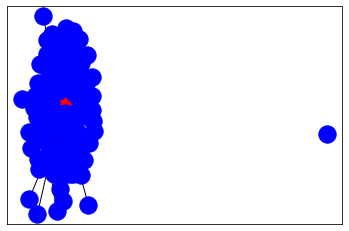

In [4]:
H = nx.Graph(A)
h = np.array(H)
pos = nx.spring_layout(H) 
z=[]
x=[]
for i in h:
    if i>100:
        z.append(i)
    if i<100:
        x.append(i)
#nx.draw(H, pos=nx.spring_layout(H), with_labels=True, node_color='pink', edge_color='green')
#nodes: 
nx.draw_networkx_nodes(H, pos, z, node_color="r")
nx.draw_networkx_nodes(H, pos, x, node_color="b")

#Edges: 
nx.draw_networkx_edges(H,pos)


In [5]:
H.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105))

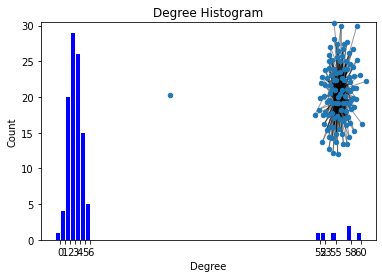

In [6]:
#Degree Distribution
degree_sequence = sorted([d for n, d in H.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = H.subgraph(sorted(nx.connected_components(H), key=len, reverse=True)[0])
pos = nx.spring_layout(H)
plt.axis("off")
nx.draw_networkx_nodes(H, pos, node_size=20)
nx.draw_networkx_edges(H, pos, alpha=0.4)
plt.show()